# Aim
The aim is to test pytesseract on all image formats

Original, Binary, Gray


In [1]:
import cv2
import pytesseract
import numpy
import matplotlib.pyplot as plt
import glob

import math
from termcolor import colored

tess_config = "-c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789 --psm 6"


In [2]:
def get_image_formats(img):

    # Scales, calculates absolute values, and converts the result to 8-bit.
    plate_image = cv2.convertScaleAbs(img, alpha=(255.0))

    # convert to grayscale and blur the image
    gray = cv2.cvtColor(plate_image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(7,7),0)

    # Applied inversed thresh_binary 
    binary = cv2.threshold(blur, 180, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    kernel3 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    dilate = cv2.morphologyEx(binary, cv2.MORPH_DILATE, kernel3)
    
    return plate_image, gray, blur, binary, dilate

In [3]:
def image_OCR(img, image_format = 'binary'):
    plate_image, gray, blur, binary, dilate = get_image_formats(img)
    #plt.imshow(binary, cmap = "gray")
    if image_format == 'original':
        inimg = plate_image
    elif image_format=='binary':
        inimg = binary
    elif image_format =='gray':
        inimg = gray
        
    final_string = resized_image_string = pytesseract.image_to_string(inimg, config=tess_config, lang="eng")
    return final_string, inimg
        

In [4]:
def get_allsize_strings(test_image, image_format = 'binary'):
    maxw = 10
    maxh = 5

    sc = 64

    str_list = []

    #plt.figure(figsize = (30,30))
    imcnt = 1
    for resh in range(0,maxh):
        for resw in range(resh+1,maxw):

            #print(imcnt)
            ww = sc + (resw*sc)
            hh = sc + (resh*sc)
            resized_test_image = cv2.resize(test_image, (ww,hh),interpolation = cv2.INTER_AREA)
            resized_image_string, inimg= image_OCR(resized_test_image.astype(numpy.uint8)/255, image_format)
            titlestr = str(f'{ww}x{hh} : {resized_image_string}')
            str_list.append(resized_image_string)

            #print(f'Detected strings : {titlestr}')


            imcnt = imcnt + 1
            
    return str_list

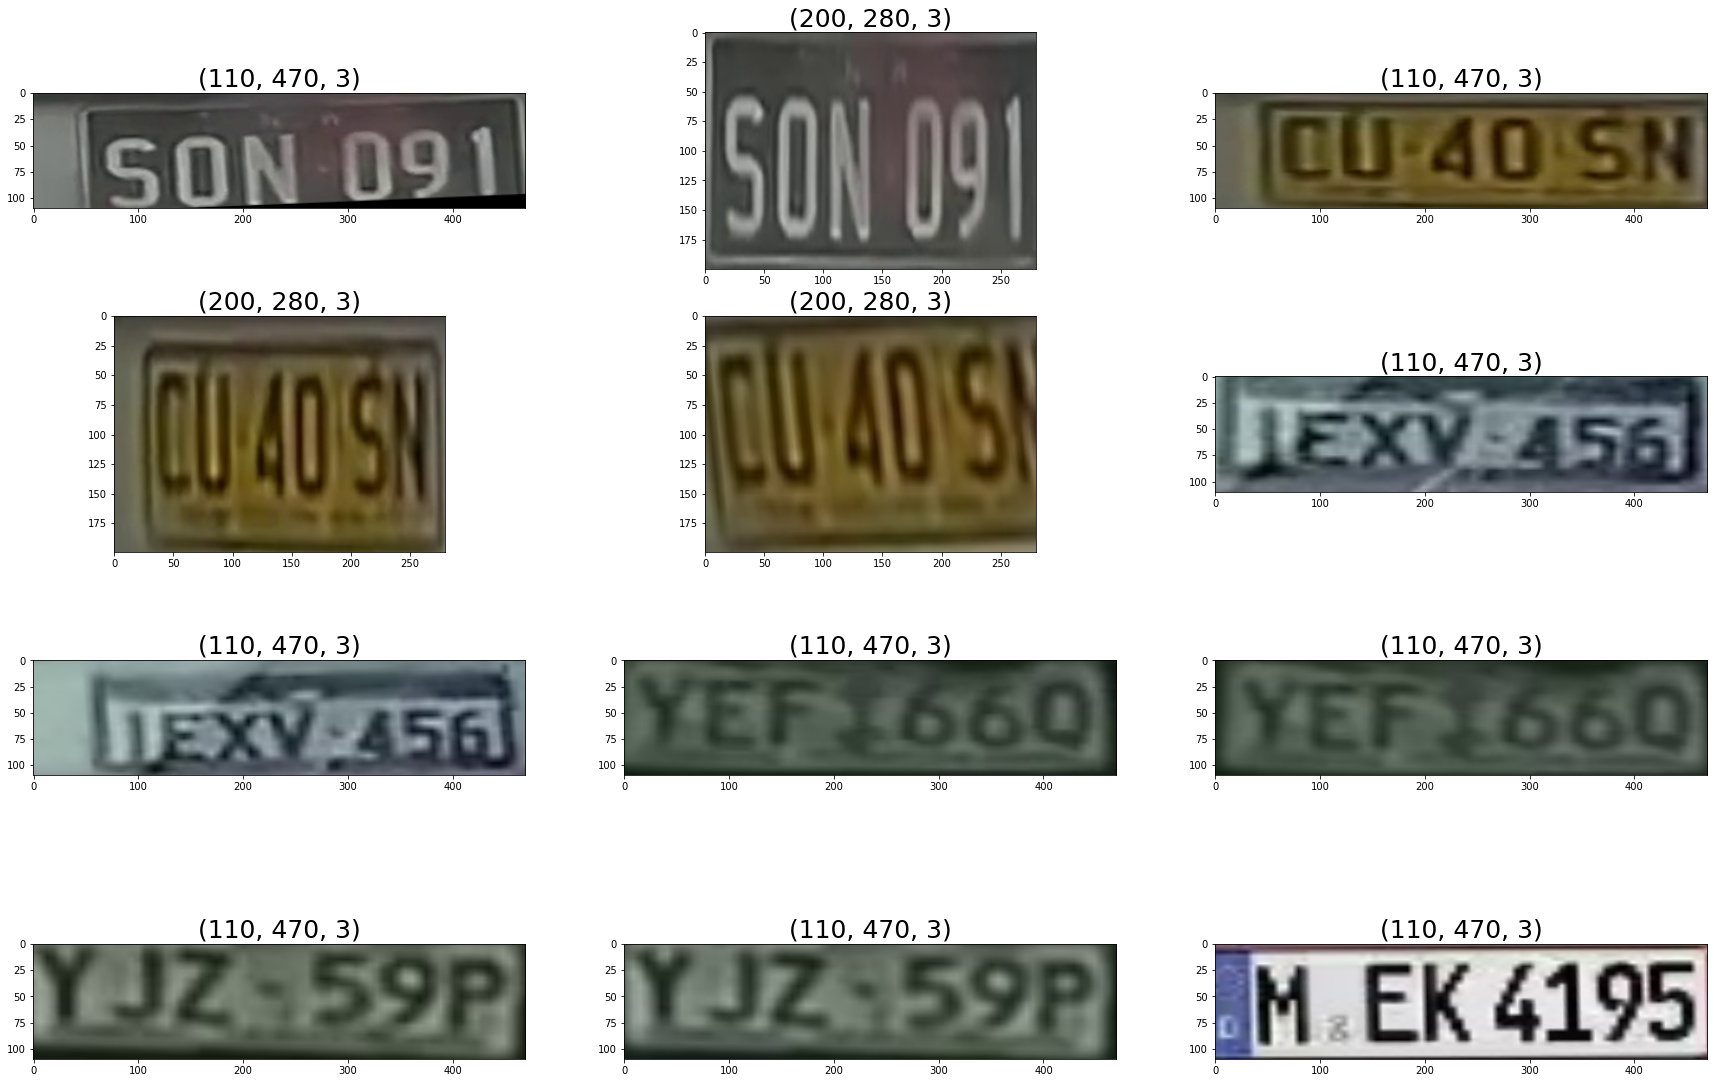

In [5]:
fnames = glob.glob('plate_samples/*.jpg')
fnames.sort()
#print(fnames)

cols = 3
rows = math.ceil(len(fnames)/cols)

plt.figure(figsize=(30,rows*5))
for fcnt, f in enumerate(fnames):
    img = plt.imread(f)
    plt.subplot(rows,cols,fcnt+1)    
    plt.imshow(img)
    title = str(img.shape)
    plt.title(title, fontsize=25 )

In [6]:
def test_all_formats(test_image):

    test_image_string, inimg = image_OCR(test_image.astype(numpy.uint8)/255, 'original')    
    print(colored(f'Original img pred string : {test_image_string}','red'))
    plt.imshow(inimg, cmap = "gray")
    plt.show()

    str_list = get_allsize_strings(test_image, image_format = 'original')
    print('Binary string list of various resizes')
    print(str_list)
    print('**************************************')
    test_image_string, inimg = image_OCR(test_image.astype(numpy.uint8)/255, 'binary')
    print(colored(f'Binary img pred string : {test_image_string}','red'))
    plt.imshow(inimg, cmap = "gray")
    plt.show()

    str_list = get_allsize_strings(test_image, image_format = 'binary')
    print('Binary string list of various resizes')
    print(str_list)

    print('**************************************')
    test_image_string, inimg = image_OCR(test_image.astype(numpy.uint8)/255, 'gray')
    print(colored(f'Gray img pred string : {test_image_string}','red'))  
    plt.imshow(inimg, cmap = "gray")
    plt.show()

    str_list = get_allsize_strings(test_image, image_format = 'gray')
    print('Gray string list of various resizes')
    print(str_list)

Original img pred string : ti eicnl


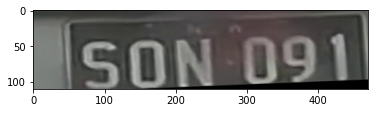

Binary string list of various resizes
['Gl', 'Bini', 'Reichl', 'tera', 'etal mcee', 'Bi- oN 091', '-—(\\ral sete', '(eral see ee', '(Ch Sra see t ee', 'Gen', 'Gl', 'Bric', '‘Biveicn', 'Rimes', 'NicON 091.', 'tt eicel', 'et ercan', 'Cnn', 'Rn', 'Gil', 'Birt', '‘Onc', 'ON O91', 'Sic qN 091', 'cy', 'Sian', 'Bri', 'Gil', 'Rin', 'Btn', 'Are', 'er', 'Ral', 'Brim', 'Gi)']
**************************************
Binary img pred string : BcoN 091


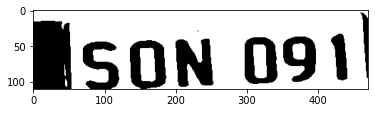

Binary string list of various resizes
['A cow 09!', 'Bcon o91!', 'BcON O91', 'BCON 091)', "B-ON 091'", 'B-oON 091', 'MooN 021)', 'M— oN 021!', 'Mon 082 1 |', 'Icy 091', 'Icon 091', 'Acq 091', 'con oot!', 'Econ 091', 'BcON 091', 'BcON 091', 'BcON 091)', 'coy 01', 'Rin', 'Icon 091', 'can 091', 'Boon 091', 'con 091', 'can 091', 'iy', 'Icay 091', 'AoW 091', 'Ic oW 091', 'Icon 091', 'Icon 091', 'cy 0', 'Icay oot', 'Hoy 091', 'Icy 091', 'con 091']
**************************************
Gray img pred string : teen


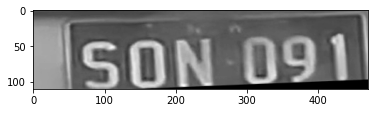

Gray string list of various resizes
['Gl', 'Bien', 'eich', 'tera', 'etal mca', 'Bi- oN 091)', '“lal cece', '(ral sees ee', '(Sra see', 'Grin', 'Gi)', 'Bein', 'Bier', 'Rimes', 'NicON 091.', 'ti eicel', 'et ercan', 'Cnn', 'en', 'Gil', 'Birt', '‘Snel', "cON-O91'", 'Bivnicnl', 'cy', 'Sia', 'Brin', 'Gil', 'Rin', 'Bnei', 'Arey', 'ern', 'Rta', 'Bim', 'Gi)']
********************************************************************************************
Original img pred string : aI)


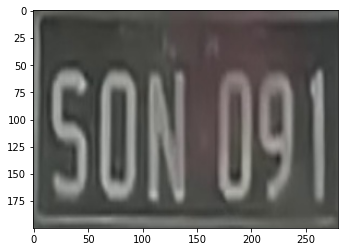

Binary string list of various resizes
['Ce', 'ISON 091', 'yma', 'falta', 'yale', 'ISON O9O1', 'ISON OO1', 'Rael eel', '‘SON OO', 'RINT', 'Sen', 'imen', 'ISON 091', 'Ci een', 'ial eel', 'Gia mecnl', 'el mie', 'an', 'RT', 'CI', 'Cen', 'SON 091', 'ISON 091', 'ISON 091', 'ST', 'RIT)', 'Ben', 'Irn', 'Cen', 'Sime', 'ST', 'SON 09', 'Ry', 'Ry', 'Sen']
**************************************
Binary img pred string : SON 09


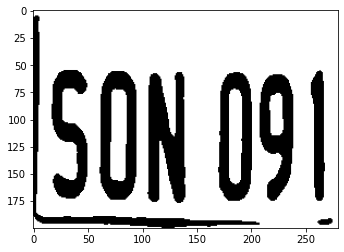

Binary string list of various resizes
['SON 091', 'ISON 091', 'ISON 091', 'ISON O91', 'ISON O91', 'ISON OO1', 'ISON OO', 'iIsoOoON OO', 'ISON OOT', 'SON 091', 'SON 091', 'ISON 091', 'ISON 091', 'ISON 091', 'ISON 091', 'ISON O91', 'ISON O91', 'SON 091', 'SON 091', 'SON 091', 'ISON 091', 'ISON 091', 'ISON 091', 'ISON 091', 'SN 91', 'SON 091', 'SON 091', 'SON 091', 'SON 091', 'ISON 091', 'Song', 'SON 091', 'SON 091', 'SON 091', 'SON 091']
**************************************
Gray img pred string : aI)


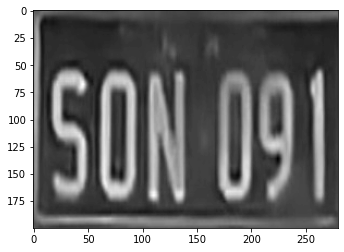

Gray string list of various resizes
['Sen', 'ISON 091', 'ymca)', 'fell', 'Eyal meal', 'ISON O91', 'ISON OOCO1', 'iISoOoOnN OCO1', 'iSCOnN OC', 'RINT', 'Cen', 'mc)', 'Cu wied', 'Ci een', 'ia) mel', 'Cia eecel', 'elma', 'an', 'RT', 'Sen', 'Cee', 'eee', 'ISON 091', 'Ci mich', 'ST', 'RTT', 'Cen', 'Sen', 'Cnc', 'Ci micn', 'SIT', 'oN 09', 'SIT', 'ny', 'Sen']
********************************************************************************************
Original img pred string : ; (cU-40'SN


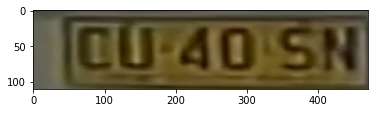

Binary string list of various resizes
['(QUA0SN', "‘(CUA0'SN", "‘[G040'SN", "‘[GW-A0'SN", '[gt AO SN', '{ete ao sn', 'faetrao sn', '{[eatrao sn', 'feta o Sr', '', '(QUAN', "(OU'40'SN", "(CUA0'SN", "‘|CUA0'SN", "‘[GA0'SN", '‘/G0°40°SN', "[GHAO'SN", '', '(Ao', '(QUA0SN', '(CUO', '‘(U40SK', "(cU40'SN", "‘(GW40'SN", '', '', '(ansh', '(U0', '{QU40SN', '‘(a0sh', '', '', '', '(aos', '(U0']
**************************************
Binary img pred string : (CU-40:SN


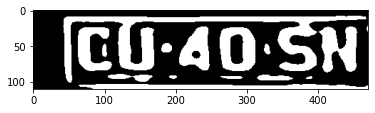

Binary string list of various resizes
['a', '(ST', '(HT', '(CU-40:SN', '(CG-40:SN', '[(cO-40:SN', '[cOR-40:SN', '[cG-40-SN', '[Gt-40-SnHN', '', 'ATS', 'RST', '(a TTR]', '(cu 7 Ti S=55]', 'COP TTT', '[(CU-40:SN', '[(cU-40:SN', '', 'AOS]', '(aly. iT', '(WRT', 'cU TT]', '(CU-40:SN', '(RTS', '', '', 'aS', 'CURIS', '(WARTS', 'RT', '', '', 'aR]', 'OS', 'CURIS']
**************************************
Gray img pred string : (cU40'SN


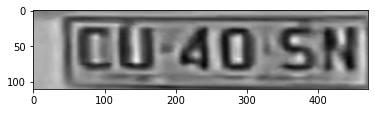

Gray string list of various resizes
['OUA0SN', "[CU40'SN", "[CUA0'SN", "[\\cL-A0'SN", "[cO-AO'SN", '[ciao SN', '[catrao sn', '[ata o sre', '[Gats-AaA Oo Sr', '', "(OUA0'SN", "CU'A0'SN", "(CUA0'SH", "(cU*A0'SN", "\\CUA0'SN", "icUA0O'SN", '‘[eHAOSN', '', 'cosh', 'QUA0SK', "CUA0'SN", "(U'A0'SN", "ICUAD'SN", "(CUA0'SN", '', '', '(aosh', "OUA0'SN", "ful ‘AD'SH", "OU'A0'SN", '', '', 'AOS', '(Waosh', "OUA0'SN"]
********************************************************************************************
Original img pred string : 


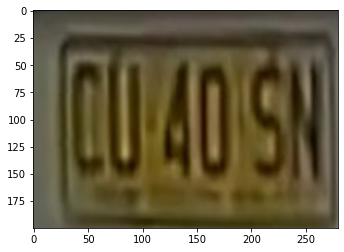

Binary string list of various resizes
['i ‘4 OSH |', "(CUTA0'SN", "(CUFA0'SN", '(GU"A0\'SN)', "{(cU-AD'‘SN", "(GU AO' SN |", '(Gts-AO SN)', '(cats AD SN)', '(cats -Aao sw :', '', 'a0 ‘405K', "(cU'4 I}", "(0 ‘4 O'SN |", "(cU‘A0'SN|", "(cA O'SN |", "(COUVA0'SN|", "(co 4 O'SN .", '', '', 'al A0SH', "CUAD'SH|", 'cA OSH’', "U4 0'SN|", '(oly O\\SN', '', '', 'Cl ANSN', 'CUA0SH', "CU/A0'SN'", "CU/AD'SN|", '', '', '', 'CUA0SN', "QUA0'SN"]
**************************************
Binary img pred string : 


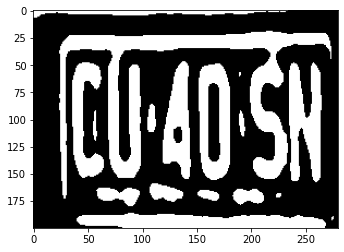

Binary string list of various resizes
['OH', 'Aa', '{€0-40:SN', '-(€0-40:SN', '(€G-40-SN', '{€G-40-SN°', 'feO-40-SN', 'mM (ed € pros es SE', 'fEena-40-SN', '', 'aS', 'ST', 'PE)', "(CU-40:'SN", "(CU:40'SN'", "(CU-40'SN", "(CU-40'SN’", '', 'ES)', '(TS)', '(ATS', 'TET', 'CPE)', "(CU-40'SN", '', '', '(aos', 'UCTS', 'AOC TET)', 'TET)', '', '', 'ATE', '(ATE)', 'UCTS']
**************************************
Gray img pred string : 


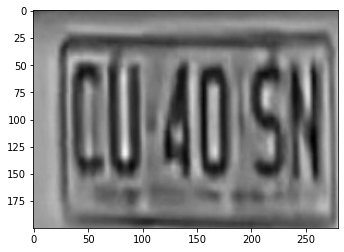

Gray string list of various resizes
['(GUA0SN', '(QUIADISN)', '(QUFA0ISN)', '(GUFADISN)', "(G@OZA0'SN)", "(G@UlAO'TSN |", '(cu aAoesn |)', '(GtsA~AO SN)', '(cats 420 SN)', '', '(OU/A0iSN', 'CUADISN', '(CUFA0ISN|', '(CUSA0ISN)', '(CUFA0ISN)', '(CUFA0ISN|', '(CU-A0ISN', '', 'ueosh', 'CUA0SN', '(CUADSN', "(CUA0'SN)", '(CU‘ADISN', "(GUA0ISN'", '', '', 'CUA0SN', 'CUA0SN', "(QUAOSN'", 'CUADISN|', '', '', 'OUA0SH', 'CUAOSN', 'QUADSN']
********************************************************************************************
Original img pred string : 


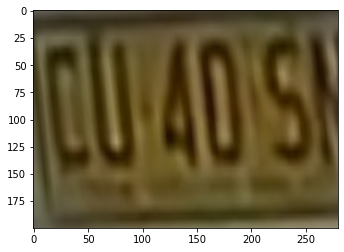

Binary string list of various resizes
["RU AT'S!", "CU AD'St", 'LU AD St', 'LAD St', 'als AD St', 'WAS AUS?', 'VWeaA8- AUS?', 'VWAS- AWS?', 'WAS AWS SS', '', "RU AD'S", "LU AD'S", 'CUADS', 'LU ADS', 'CU: AD St', 'cu AD St', 'GU AUD St', '', 'QUA0St', "RUAD'SI", "CUAD'S!", "LUAD'SI", 'CU ADSI', 'CUA St', '', '', 'RUAN', "RUAD'SI", "(CUAD'S!", "CUAD'St", '', '', 'QUADS', 'Cans', "RUAD'SI"]
**************************************
Binary img pred string : 


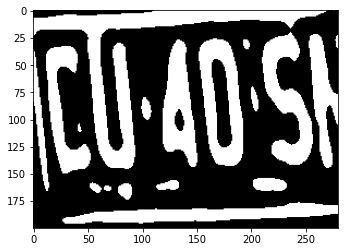

Binary string list of various resizes
['TE', 'CY AD:St', 'TAOS:', 'Vw Clr 45', '\\TAL- AD-St', '\\ wa CE -4 2 4 |', 'WAL - ADS', '\\ wa SEF -4. 2 O45 5', '\\ wa 6 Ee 4 = S45', '', 'WES', 'WE', 'LAC DSS', 'TAU Sh', 'a Ye Ts', 'ITU ADSt', 'ic ly- AD-St', '', '', 'WOES', 'WITT', 'LAUDE)', '(AC TS)', 'TAC thst', '', '', 'US', 'WETS', 'WOT', 'WES', '', '', '', 'ME', "(CUA0'St"]
**************************************
Gray img pred string : 


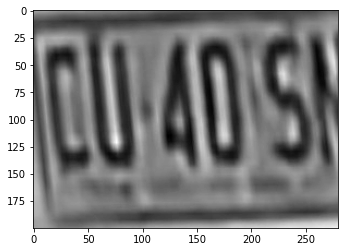

Gray string list of various resizes
['QUADS!', 'WUADS!', '\\GUEAD St', 'GU ADsSt', 'aU AUS?', 'VWGAS- AUS?', 'VWGA8S+ AUS?', 'WGA8S+ AWS?', 'W2AS+ AWS SS', '', "RU AD'S", 'CUADISt', 'PUATSS', 'GUAT St', 'GU AD St', '‘GU ADSt', 'au AD St', '', 'QUADS', "RU AD'S!", 'CUATS!', 'CUADISt', 'WUADS!', '\\CUADS', '', '', 'RUADS', "RU AD'S", 'CUATSt', "RUAD'SH", '', '', '', 'QUADS', "RU AD'S!"]
********************************************************************************************
Original img pred string : 


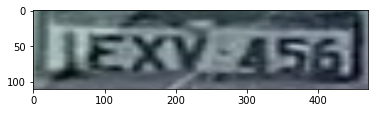

Binary string list of various resizes
['', '', '', '', 'jexy-45e]', '', 'j= xy ase]', '(j= =< -42aSe)', '3.2] =< ww -4aSef', '', 'JEXV: 456]', '', 'LEXY -456]', '', '', '', '', 'mi', 'EX 56', 'JEXV: 456)', '', '', 'LEXY -456]', 'EXV-456]', 'nim', '1B 454', 'ENV 456', 'JEXV: 456)', '', 'JEXV-456)', 'pv', 'mer', 'ENV a5', 'ENV 454', 'JEXV: 456)']
**************************************
Binary img pred string : 


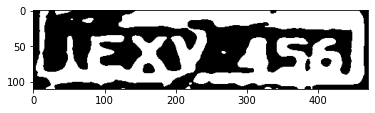

Binary string list of various resizes
['re}', '', '', '', 'UEXY 456)', 'SV 5-42 Ty 341|', 'SV =-4 2 t7-4 |', 'OY 55-4 2 ts |', 'OU 5-42 tT |', '', '', '', '', '', '', 'Ne CA', 'UEXY 456)', '', '', 'er', '', '', '', 'UEXY-456]', '', 'rar', 'har', 'er', '', 'EX) 456}', 'rn', 'ner', 'rr', 'har', 'arr']
**************************************
Gray img pred string : 


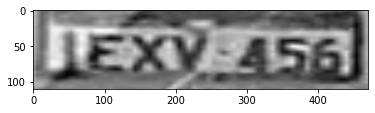

Gray string list of various resizes
['JEXV 456]', '', '', '', 'jexy-4a5e}', 'Uj=xy-45e]', 'ij=x<y ase]', '', '32 =< -42aSef', '1B 453', 'JEXV: 456]', '', 'LEXY -456]', 'EXV-456]', '', '', 'Uexy-45c]', 'mir', 'EX 456', 'JEXV: 456)', 'JEXV:456)', '', '', 'LEXY -456]', 'vss', 'BN 454', 'ENV 456', 'JEXV: 456]', '', 'EXV-456)', 'pv', 'mer', 'ENV a5s', 'ENV 454', 'JEXV 456]']
********************************************************************************************
Original img pred string : Exv- 4581


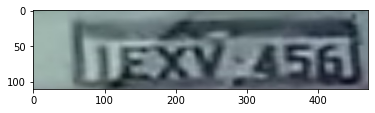

Binary string list of various resizes
['', 'exv-a5gl', 'Nexv- 45g)', '(Eexv-45el', 'Ex 4551', '(exv 45681', 'TS Sv _45et', 'T= Sv _ ase', '‘> =—Sv_ Sasol', '', '', '', '', 'Exv 4561', '', 'Ex 4561', '(Exv- 4581', 'mir', '', '', 'FexV A561', 'TExy 4561', 'VExy A561', 'Exv 4561', 'ares', 'Rr', 'any 54', 'Tey 56)', 'TEXy 456', 'TExv 45g)', 'are', 'avid', 'ava', 'TEx sg', 'Ney 56)']
**************************************
Binary img pred string : aera


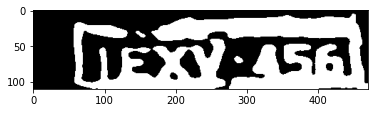

Binary string list of various resizes
['arr', '', '', '', '', '', 'SVs. er CT I', 'MEexy «Set', 'Se. ae st', 'rr', 'nr', 'Paver', 'Wave', 'Waa prtya|', 'eva', 'Wawa', 'Nex 456th', 'rir', 'rir', 'avery', 'ever', 'Wavirra!', 'iavwea', 'avec', 'rir', 'rer', 'reer', 'Tver', 'eer', 'Tavern', 'er', 'oer', 'ver', 'raver', 'Teaver']
**************************************
Gray img pred string : Exv- 4581


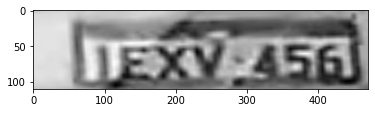

Gray string list of various resizes
['Nexy asa', 'ex a5gl', 'Nex 45g)', 'CEexv-45el', 'Ex 4551', '(Exv_45e8t', 'TT SSv_2set', 'T= Sv ase', '‘l= Sv Sasol', 'rr', 'Vexv tsa', 'exy. 45g)', 'Texy- 45g]', 'Exv- 4561', '(Exv- 456i', 'Ex 4561', '(Exv- 4581', 'mr', 'FAV Ga', 'Tey tsa', 'TEXV A561', 'VExy 456i', 'VExy 456)', 'VExv 456)', 'ares', 'ava', 'Tay 5a', 'Tey 56)', 'TEXy 56', 'Texv 456)', 'na', 'avd', 'av', 'TEx sg', 'Tey 56)']
********************************************************************************************
Original img pred string : YEF 2560)


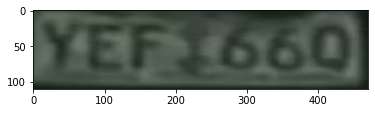

Binary string list of various resizes
['YEF {O00', 'YEF 2660)', 'YEF 2660)', 'YEF 2560}', 'YEF ISSO}', 'YEFLSSO}', 'YEFL2oSo}]', 'YEFrLoOSO}]', 'JVTEF 2 ooo}', '', 'YEFIO00|', 'YEF 660}', 'YEF 2660)', 'YEF 2660)', 'YEF 2660)', 'YEF L660}', 'YEF S560}', '', '', 'YEF {O00}', 'YEF 660}', 'YEF 7660]', 'YEF 2660)', 'YEF 2660)', '', '', 'YEFYO00', 'YEF O00)', 'YEF 1660}', 'YEF 660}', '', '', '', 'YEFI600', 'YEF O00)']
**************************************
Binary img pred string : YEF T6600}


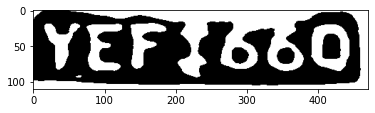

Binary string list of various resizes
['faatsf)', 'YEFT660)', 'YEFY660}', 'YVEF T&66O}', 'YEF IT&6EO}', 'YEFIE6EO}]', 'YEF F&éE6EO}]', 'VYVEF F&EEO}]', 'WEF FJSLEOQO}', 'fais', 'ais)', 'aif)', 'YEF {660}', 'YEFY660}', 'YEFY660}', 'YEFI66O}', 'YVEFI6EO}', '', '', 'aah)', 'YEF $660}', 'YEF 660}', 'as 19)', 'asi)', '', '', 'ants)', 'Haass)', 'YEF {660}', 'aa)', '', '', '', 'gM', 'ais)']
**************************************
Gray img pred string : YEF 2560)


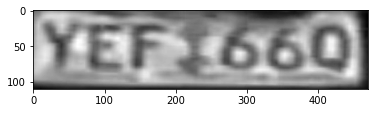

Gray string list of various resizes
['YEFIO60', 'YEF 2660)', 'YEF 2660)', 'YEF 2560}', 'YEF IS660O}', 'YEFSSESO}', 'YEF2SoSO}]', '', '', '', 'YEF O00)', 'YEF 660}', 'YEF 2660)', 'YEF 2660)', 'YEF 2660}', 'YEF 2660}', 'YEF F560}', '', '', 'YEFIO00)', 'YEF T6060}', 'YEF 2660]', 'YEF 2660)', 'YEF 660)', '', '', 'YEFYO00)', 'YEF L660)', 'YEF 1660}', 'YEF 660}', '', '', '', 'YEF {660', 'YEF L000)']
********************************************************************************************
Original img pred string : 


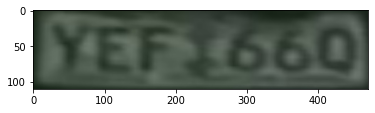

Binary string list of various resizes
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
**************************************
Binary img pred string : 


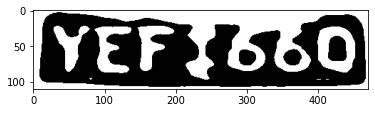

Binary string list of various resizes
['Tt', 'iH', 'aI', '', '', '', '', '', '', 'ius', 'Tae', '', '', '', '', '', '', 'faa', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
**************************************
Gray img pred string : 


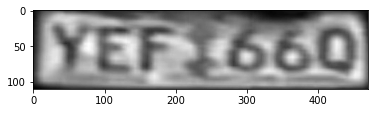

Gray string list of various resizes
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
********************************************************************************************
Original img pred string : VJZ-=S9P)


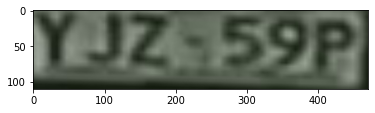

Binary string list of various resizes
['12559?', 'YJZ=59P)', 'VJZ=5S9P)', 'VTJIZ-S9P;', 'VIZ -S9P}', 'VIZ - SSP}', 'VJ 2 -~ SSP}', 'VJ 2 -~ SSP}', 'YJ 2 ~ = SFP}', '', '12597)', '1JZ559P)', 'YJZ=59P)', 'YJZ=59P)', 'VJZ=5S9P)', 'VIZ = S9P)', 'VTJIZ-S9P)', '', '', 'LZ 597)', '1JZ:59P)', '1JZ559P)', 'YJZ>59P)', 'YJZ=59P)', '', '', '', '125597)', '1JZ:59P,', '1JZ559P)', '', '', '', '', '125597)']
**************************************
Binary img pred string : YJZ-S9P)


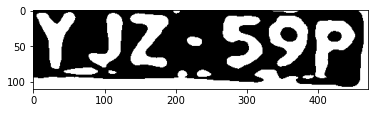

Binary string list of various resizes
['FS', 'YJZ- 59P)', 'YJZ- SOP}', 'YJIZ- SOP}', 'VJIZ-S9OP}', 'a eed id', 'VIZ-S9P!', 'VIZ -S9P!', 'VIZ - SVP', '', 'PLS', 'LSE', 'YJZ-59P)', 'PISS) if', 'Arse) gf', 'YJZ-S9P)', 'VJIZ-S9P,', '', '', 'ASE', 'LSS]', 'PISS 4', 'YJZ-59P)', 'ELSES)', '', '', '', 'ASRS', 'YJ2:59P;', 'ELSES] 4', '', 'UB', '', '', 'RISEN']
**************************************
Gray img pred string : VJZ-=S9P)


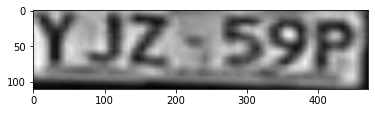

Gray string list of various resizes
['12559?', 'YJZ=59P)', 'VJZ=5S9P)', 'VTJIZ-S9P;', 'VJIZ-S9P}', 'VIZ -~ SSP}', 'VJ 2 -SoP)', 'VJ 2 -~ SSP}', 'YJ 2 ~ SSFP}', '', 'LZ 59P)', '1JZ559P)', 'YJZ=59P)', 'YJZ=59P)', 'VJZ=S9P)', 'VIZ ~S9P)', 'VLJZ-S9P;', '', '', 'LZ 59P)', '1JZ:59P)', '1JZ559P)', 'YJZ=59P)', 'VJZ=59P)', '', '', '', 'LIZ 597)', 'TJZ:59P,', '1JZ559P)', '', '', '', '', 'L259?)']
********************************************************************************************
Original img pred string : YJIZ-59P)


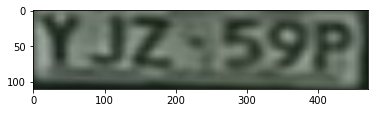

Binary string list of various resizes
['VIZ 59?', 'YJZ°59P', 'YIZ=59P)', 'VJIZ-S9P}', 'VIZ S9P}', 'VIZ - SSOP}', 'YSZ - SSP}', 'Ve = SSP', 'YS 2 ~ &oFr}', '', '12:59?', 'YJZ:59P', 'YJZ:59P)', 'YJZ-59?P)', 'YJZ-59P)', 'VYJZ-59P}', 'VIZ S9P}', '', '', '12559?', 'YJZ:59P', 'YJZ:59P)', 'YJZ°59P)', 'YJZ°=59P)', '', '', '', '12559?', '1JZ:59P', 'YJZ:59P', '', '', '', '123599', '12559?']
**************************************
Binary img pred string : OSES)


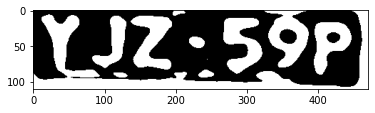

Binary string list of various resizes
['AR', 'ALR', '1 OPS]', 'YJZ-5S9P]', 'VYIZ-S9OP)', 'YJIZ-S9P}', 'YJIZ-S9OP}', 'VYIZ-SOP]', 'WSIS -SOoP i}', '', 'ALS}', 'ELST?', 'OTST', 'OLE', 'OPS]', 'YJZ-S9P}', '| MPSS)', '', '', 'ALT}', 'ELSES]', '1JZ:59P)', 'OSES', 'ATS', '', '', 'FURST}', 'ELST', '1J2:59P', 'ELSE],', '', '', '', 'RS', 'ELST)']
**************************************
Gray img pred string : VJIZ=59P)


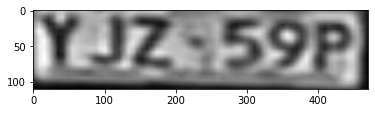

Gray string list of various resizes
['YIZS59P', 'YIZ°59P', 'VIZ=59P)', 'VIZ S9P}', 'VIZ SSP}', 'VIZ -SoP}', 'VY SI2Z- SSP}', 'YSZ -~ SSP}', 'YSZ ~ &oFr }', '', 'T2359?', 'YJZ:59P', 'YJZ:59P', 'YJZ=59P)', 'YJZ-59P)', 'VYJZ-59P}', 'VJIZ-5S9P}', '', '', '12559?', 'YJZ:59P', 'YJZ:59P)', 'YJZ559P)', 'YJZ=59P)', '', '', '12559?', '12559?', '1JZ:59P', 'YJZ:59P)', '', '', '', '123597', '12559?']
********************************************************************************************
Original img pred string : iM. EK 4195


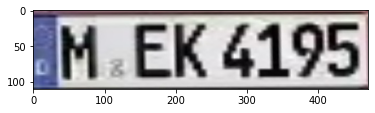

Binary string list of various resizes
['NEK 4195', 'MEK 4195', 'MEK 4195', 'iM. EK 4195', 'iM.EK 4195', 'iMEK 4195', 'MEK 4195', 'TH EK 4195', 'mMmEK 4195', '', 'MEK 4195', 'MEK 4195', 'M.EK 4195', 'M.EK 4195', 'M.EK 6195', '"M.EK 4195', '"MH. EK 4195', 'WELL', '', 'MEK 4195', 'MEK 4195', 'MEK 4195', 'iM .EK 4195', 'iM. EK 4195', 'HELM', '', 'H EK AL%', 'MEK 4195', 'MEK 4195', 'M.EK 4195', 'HELA', 'RU', '', 'HEK 4195', 'MEK 419']
**************************************
Binary img pred string : eet hy


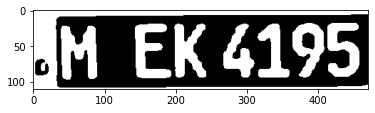

Binary string list of various resizes
['TO', 'Mats', '25', 'eee', 'AM EK 4195', 'AM EK 4195', 'Le eet', 'wee PGC', 'eo 2G Cy', 'HELM', 'Meu', 'Wot', 'Mts', 'ea each', 'eas', 'ae ath', 'AM EK 4195', 'W EAL', 'CG', 'IG', 'ean:', 'Le', '(te', 'each', 'TR', 'EXAMS', 'TG:', 'Me', 'Tan', 'Meats', 'Meh', 'RU', 'ea', 'IG:', 'MG']
**************************************
Gray img pred string : "MEK 4195


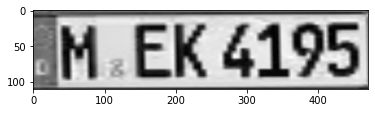

Gray string list of various resizes
['MEK 4195', 'MEK 4195', '"M.EK 4195', '"MEK 4195', '°M.EK 4195', '°M EK 4195', '“MEK 4195', '“MEK 4195', '“MH EK 4195', 'HELM', 'MEK 4195', 'MEK 4195', 'MEK 4195', '1M. EK 4195', '"MEK 4195', 'uM. EK 4195', '"MEK 4195', 'WELL', 'W EKA', 'MEK 4195', 'iM EK 4195', 'MEK 4195', 'MEK 4195', 'wM.EK 4195', 'HELM', 'HELM', 'W EK 496', 'MEK 4195', 'iM EK 4195', 'iM.EK 4195', 'HELA', 'RU', 'EK (195', 'WEKAL9S', 'MEK 4495']
********************************************************************************************


In [7]:
for img_path in fnames:
    test_image = plt.imread(img_path)
    test_all_formats(test_image)
    print('********************************************************************************************')